## Analyzing the Food Production around the Globe.


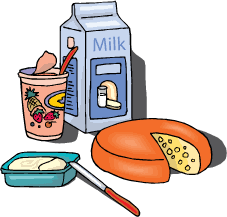

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for advanced visualizations
import folium
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# for providing path
import os
print(os.listdir('../input/'))

['FAO.csv']


In [2]:

# reading the data
data = pd.read_csv('../input/FAO.csv', encoding = "ISO-8859-1")

# ENODING ISO-8859-1 is a single byte encoding which can represent the first 256 unicode characters
# Both UTF-8 and ISO-8859-1 encode the ASCII Characters the same.

# checking the shape of the data
print(data.shape)

(21477, 63)


In [3]:
data.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,1963.0,2215.0,2310.0,2335.0,2434.0,2512.0,2282.0,2454.0,2443.0,2129.0,2133.0,2068.0,1994.0,1851.0,1791.0,1683.0,2194.0,1801.0,1754.0,1640.0,1539.0,1582.0,1840.0,1855.0,1853.0,2177.0,2343.0,2407.0,2463.0,2600.0,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,205.0,233.0,246.0,246.0,255.0,263.0,235.0,254.0,270.0,259.0,248.0,217.0,217.0,197.0,186.0,200.0,193.0,202.0,191.0,199.0,197.0,249.0,218.0,260.0,319.0,254.0,326.0,347.0,270.0,372.0,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,73.0,74.0,71.0,70.0,72.0,76.0,77.0,80.0,60.0,65.0,64.0,64.0,60.0,55.0,53.0,51.0,48.0,46.0,46.0,47.0,46.0,43.0,43.0,40.0,50.0,46.0,41.0,44.0,50.0,48.0,43.0,26.0,29.0,70.0,48.0,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,223.0,219.0,225.0,240.0,244.0,255.0,185.0,203.0,198.0,202.0,189.0,174.0,167.0,160.0,151.0,145.0,145.0,148.0,145.0,135.0,132.0,120.0,155.0,143.0,125.0,138.0,159.0,154.0,141.0,84.0,83.0,122.0,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,236.0,200.0,201.0,216.0,228.0,231.0,234.0,240.0,228.0,234.0,228.0,226.0,210.0,199.0,192.0,182.0,173.0,170.0,154.0,148.0,137.0,144.0,126.0,90.0,141.0,150.0,159.0,108.0,90.0,99.0,72.0,35.0,48.0,89.0,63.0,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
# adding a total production column

data['total'] = (data['Y1961'] + data['Y1962'] + data['Y1963'] + data['Y1964'] + data['Y1965'] + data['Y1966'] + 
    data['Y1967'] + data['Y1968'] + data['Y1969'] + data['Y1970'] + data['Y1971'] + data['Y1972'] + data['Y1973'] +
    data['Y1974'] + data['Y1975'] + data['Y1976'] + data['Y1977'] + data['Y1978'] + data['Y1979'] + data['Y1980'] + 
    data['Y1981'] + data['Y1982'] + data['Y1983'] + data['Y1984'] + data['Y1985'] + data['Y1986'] + data['Y1987'] + 
    data['Y1988'] + data['Y1989'] + data['Y1990'] + data['Y1991'] + data['Y1992'] + data['Y1993'] + data['Y1994'] + 
    data['Y1995'] + data['Y1996'] + data['Y1997'] + data['Y1998'] + data['Y1999'] + data['Y2000'] + data['Y2001'] + 
    data['Y2001'] + data['Y2002'] + data['Y2003'] + data['Y2004'] + data['Y2005'] + data['Y2006'] + data['Y2007'] + 
    data['Y2008'] + data['Y2009'] + data['Y2010'] + data['Y2011'] + data['Y2012'] + data['Y2013'] )

In [5]:
data.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,18062.000000,18062.000000,20490.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,20865.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000,1.793800e+04
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,225.988962,230.419222,238.415487,244.340952,250.262237,254.238655,257.454677,267.323336,267.126547,274.443528,276.573364,285.963095,299.790166,305.835099,305.666072,311.656428,320.981157,326.911473,339.557866,344.345468,351.743227,361.941800,363.976363,372.351656,375.418115,379.449950,386.007760,389.309370,397.079607,404.490822,415.261922,421.623053,428.878505,441.677019,451.771819,458.723826,465.458964,472.693298,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480,2.058997e+04
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,2100.228354,2132.244717,2189.166883,2266.964627,2322.967733,2372.627182,2421.964322,2528.042608,2365.411987,2464.376834,2427.373749,2555.249955,2757.473984,2768.374398,2730.433908,2774.265032,2931.209478,3002.929914,3101.632149,3094.241689,3231.480597,3312.098595,3236.741120,3349.602911,3422.824069,3453.922037,3509.290447,3555.648726,3714.324984,3754.281929,3962.388448,4036.101905,4149.057052,4340.531660,4649.579544,4751.597094,4868.625666,4911.216237,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479,1.892521e+05
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000,0.000000e+00
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000e+01
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.

## Data Visualization

In [6]:
df = data['Area'].value_counts().sort_index().index
df2 = data.groupby('Area')['total'].agg('mean')

trace = go.Choropleth(
    locationmode = 'country names',
    locations = df,
    text = df,
    colorscale = 'Picnic',
    z = df2.values
)
df3 = [trace]
layout = go.Layout(
    title = 'Mean Production in Differet Parts of World')

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

In [7]:
df = data['Area'].value_counts().sort_index().index
df2 = data.groupby('Area')['Y1961'].agg('mean')

trace = go.Choropleth(
    locationmode = 'country names',
    locations = df,
    text = df,
    colorscale = 'Rainbow',
    z = df2.values
)
df3 = [trace]
layout = go.Layout(
    title = 'Mean Production in 1961 in Differet Parts of World')

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

In [8]:
df = data['Area'].value_counts().sort_index().index
df2 = data.groupby('Area')['Y2013'].agg('mean')

trace = go.Choropleth(
    locationmode = 'country names',
    locations = df,
    text = df,
    colorscale = 'Hot',
    z = df2.values
)
df3 = [trace]
layout = go.Layout(
    title = 'Mean Production in 2013 in Differet Parts of World')

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

In [9]:
# delete the total column

data = data.drop(['total'], axis = 1)


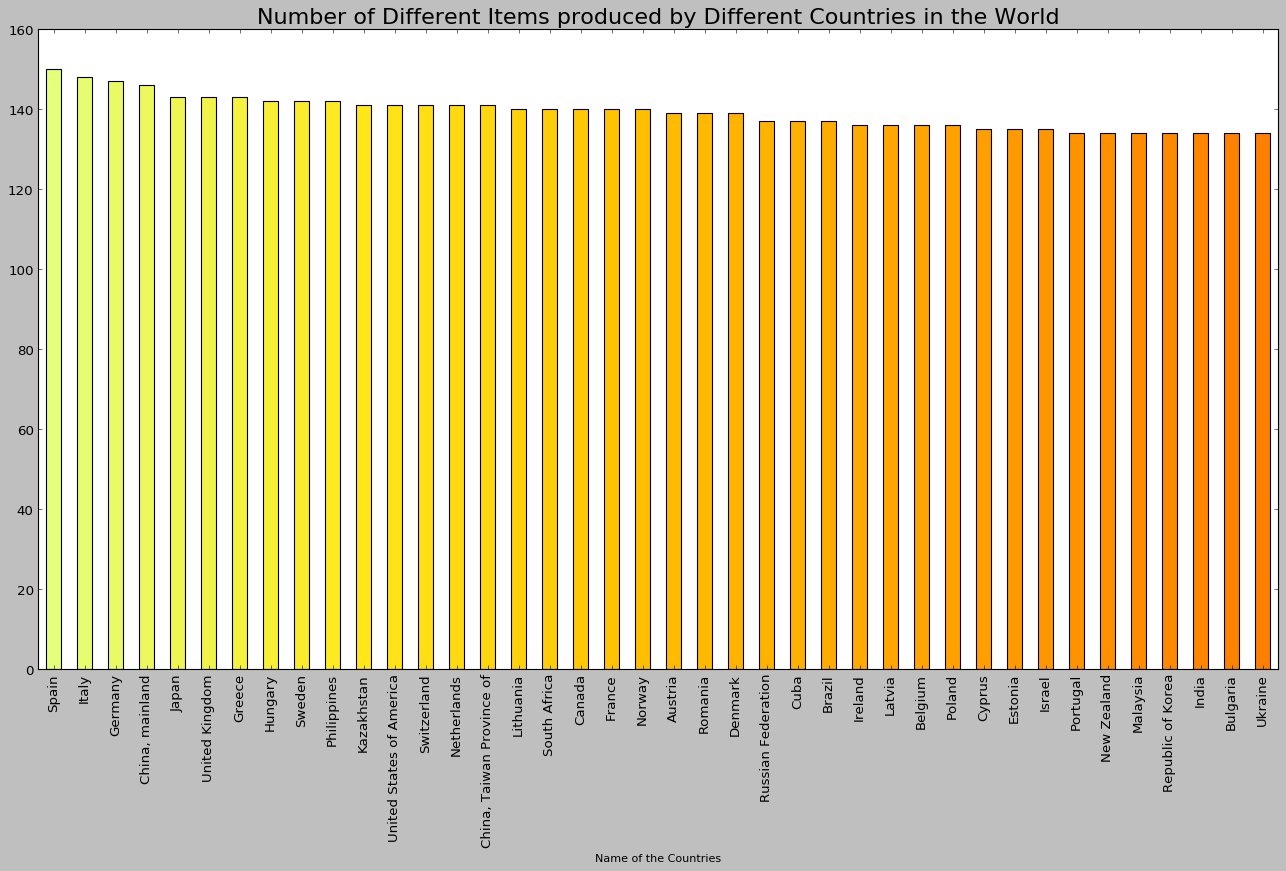

In [10]:
color = plt.cm.Wistia(np.linspace(0, 1, 40))
plt.style.use('_classic_test')

data['Area'].value_counts().sort_values(ascending = False).head(40).plot.bar(figsize = (20, 10), color = color)
plt.title('Number of Different Items produced by Different Countries in the World', fontsize = 20)
plt.xlabel('Name of the Countries', fontsize = 10)
plt.show()

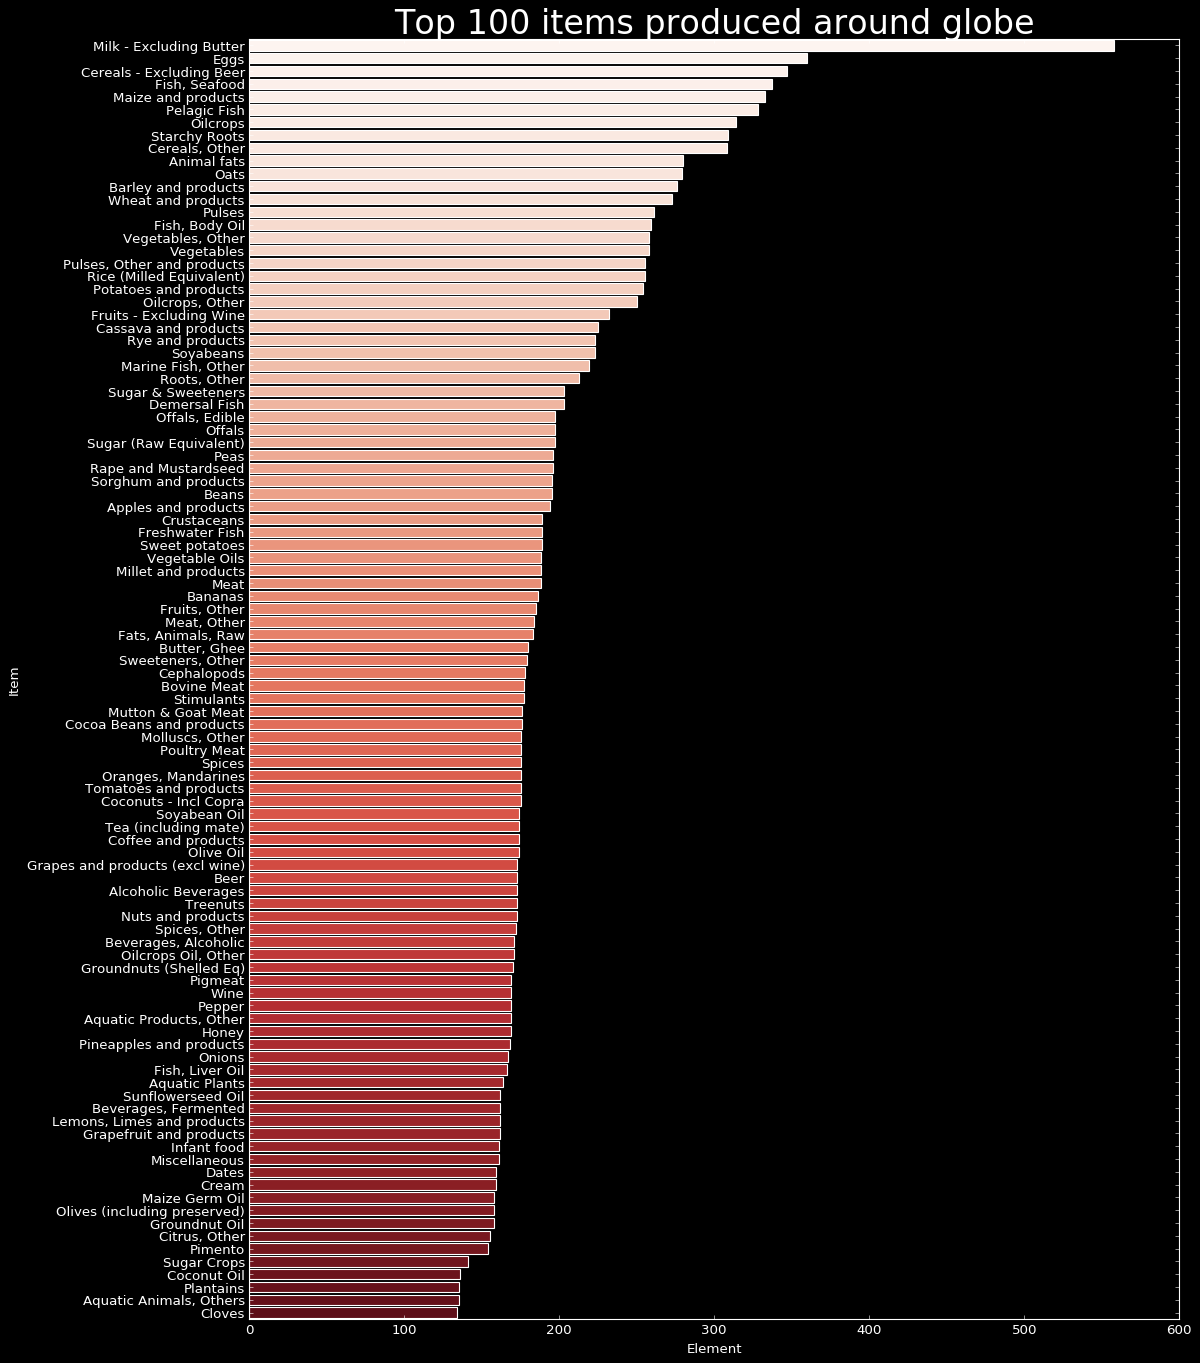

In [11]:
# Top Products around the globe

# setting the style to be ggplot
plt.style.use("dark_background")

items = pd.DataFrame(data.groupby("Item")["Element"].agg("count").sort_values(ascending=False))[:100]

# plotting
plt.rcParams['figure.figsize'] = (15, 20)
#plt.gcf().subplots_adjust(left = .3)
sns.barplot(x = items.Element, y = items.index, data = items, palette = 'Reds')
plt.gca().set_title("Top 100 items produced around globe", fontsize = 30)
plt.show()

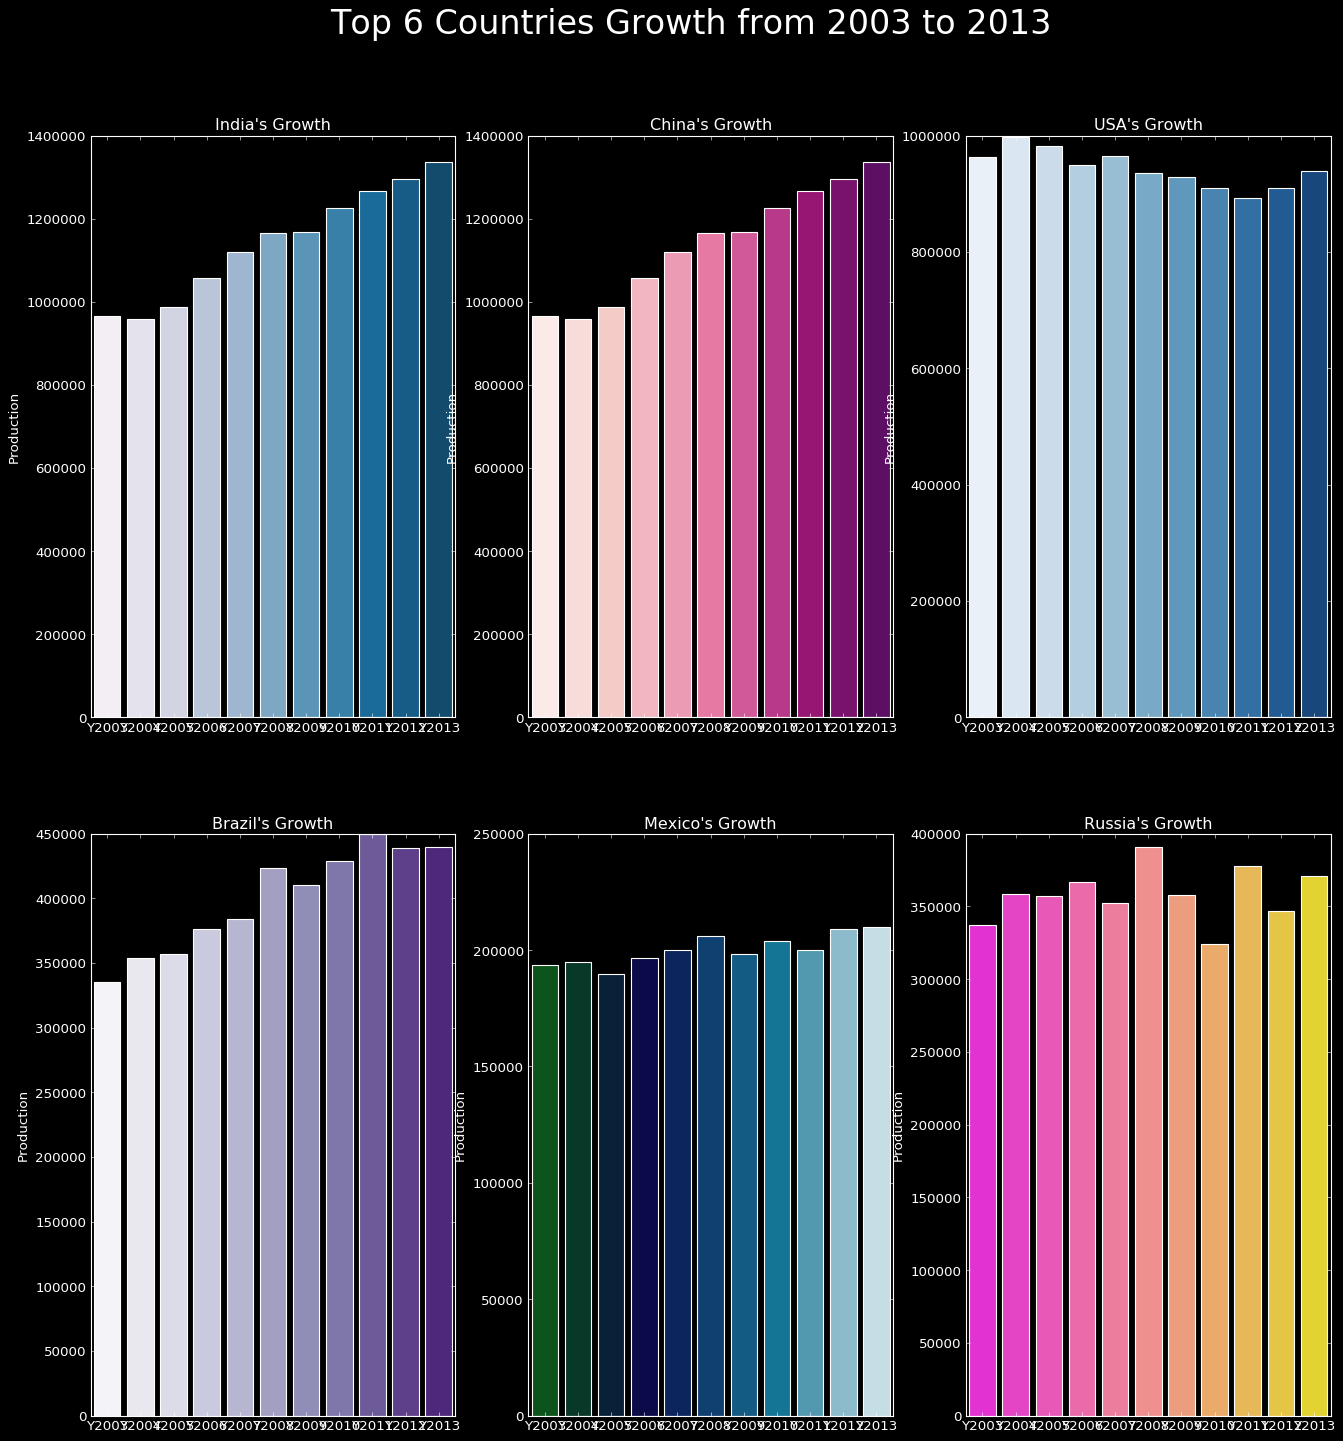

In [12]:
# setting the size of the plot
plt.rcParams['figure.figsize'] = (20, 20)


# looking at India's Growth
india_production = pd.DataFrame(data[data['Area'] == 'India'].loc[:, "Y2003": "Y2013"].agg("sum", axis = 0))

india_production.columns = ['Production']
plt.subplot(231)
sns.barplot(x = india_production.index, y = india_production.Production, data = india_production, palette = 'PuBu')
plt.gca().set_title("India's Growth")

# looking at china's growth
china_production = pd.DataFrame(data[data['Area'] == 'China, mainland'].loc[:, "Y2003":"Y2013"].agg("sum", axis = 0))

china_production.columns = ['Production']
plt.subplot(232)
sns.barplot(x = china_production.index, y = india_production.Production, data = china_production, palette = 'RdPu')
plt.gca().set_title("China's Growth")

#looking at usa's growth
usa_production = pd.DataFrame(data[data['Area'] == 'United States of America'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

usa_production.columns = ['Production']
plt.subplot(233)
sns.barplot(x = usa_production.index, y = usa_production.Production, data = usa_production, palette = 'Blues')
plt.gca().set_title("USA's Growth")

#looking at brazil's growth
brazil_production = pd.DataFrame(data[data['Area'] == 'Brazil'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

brazil_production.columns = ['Production']
plt.subplot(234)
sns.barplot(x = brazil_production.index, y = brazil_production.Production, data = brazil_production, palette = 'Purples')
plt.gca().set_title("Brazil's Growth")


#looking at mexico's growth
mexico_production = pd.DataFrame(data[data['Area'] == 'Mexico'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

mexico_production.columns = ['Production']
plt.subplot(235)
sns.barplot(x = mexico_production.index, y = mexico_production.Production, data = mexico_production, palette = 'ocean')
plt.gca().set_title("Mexico's Growth")

#looking at russia's growth
russia_production = pd.DataFrame(data[data['Area'] == 'Russian Federation'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

russia_production.columns = ['Production']
plt.subplot(236)
sns.barplot(x = russia_production.index, y = russia_production.Production, data = russia_production, palette = 'spring')
plt.gca().set_title("Russia's Growth")

plt.suptitle('Top 6 Countries Growth from 2003 to 2013', fontsize = 30)
plt.show()

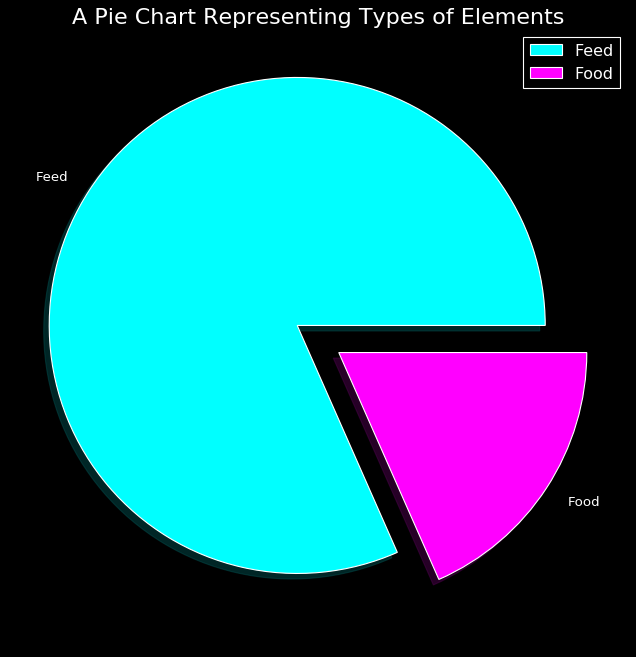

In [13]:
labels = ['Feed', 'Food']
size = data['Element'].value_counts()
colors = ['cyan', 'magenta']
explode = [0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A Pie Chart Representing Types of Elements', fontsize = 20)
plt.legend()
plt.show()

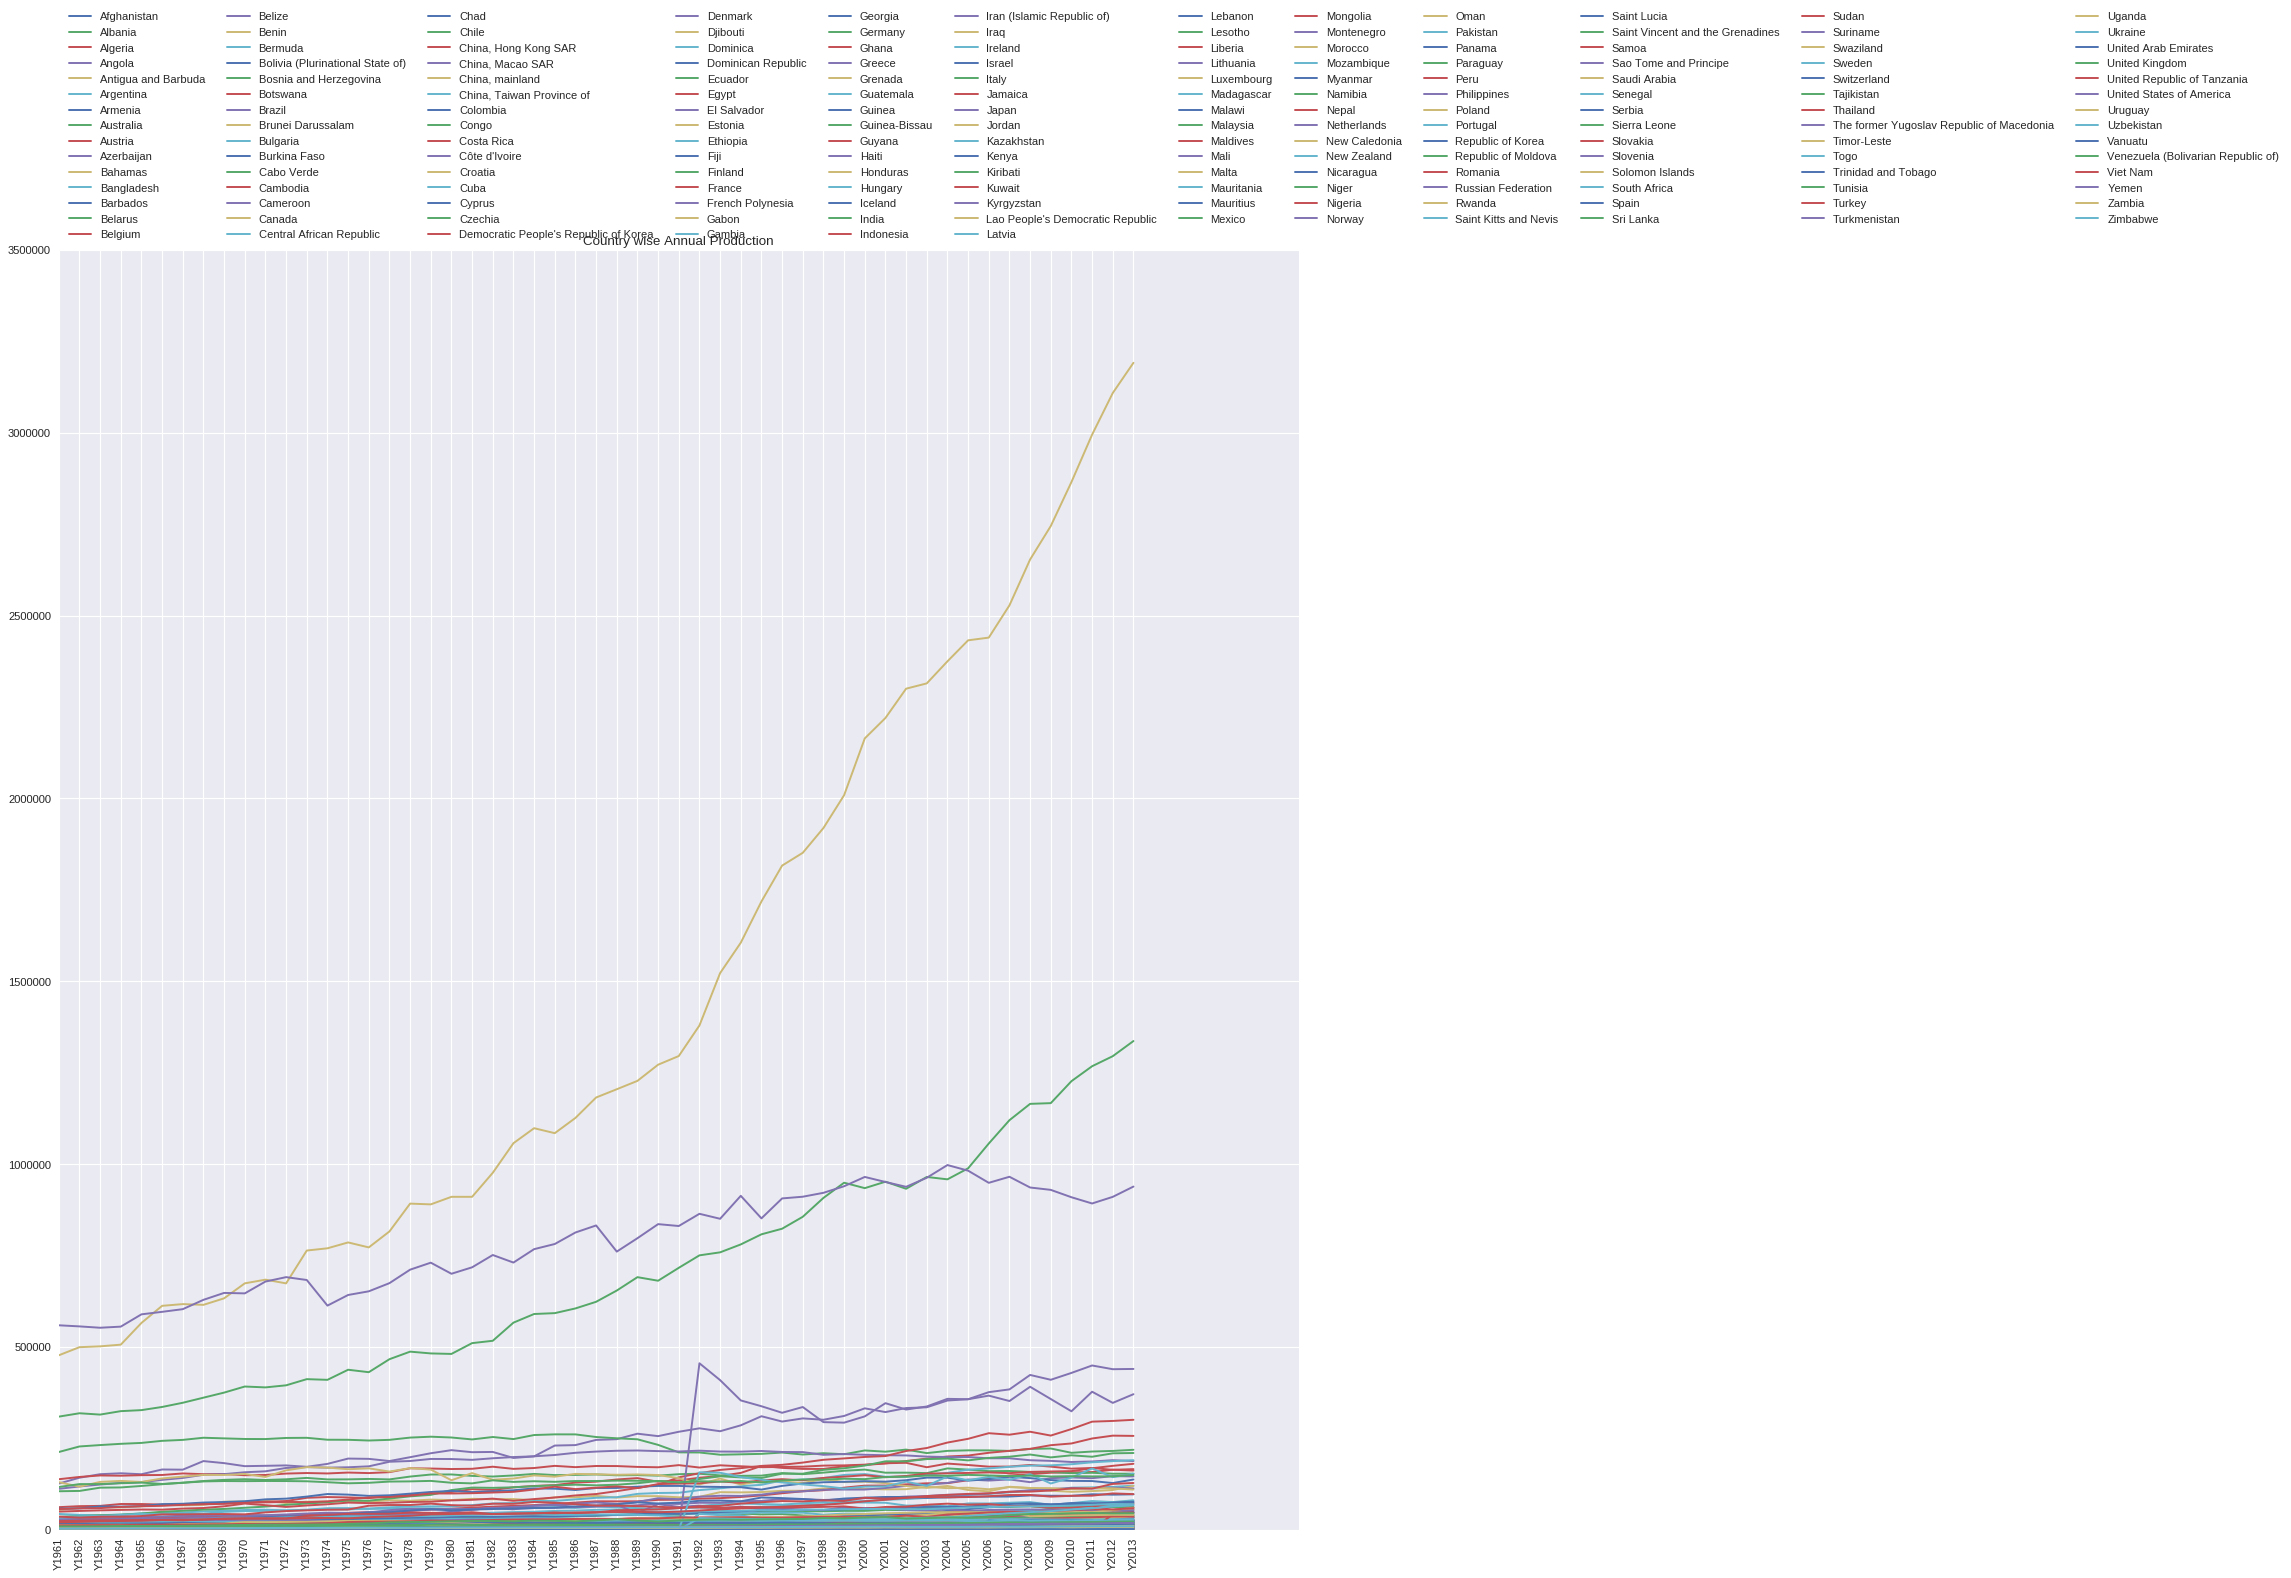

In [14]:
# plotting for the Annual Production of crops by every country

countries = list(data['Area'].unique())
years = list(data.iloc[:, 10:].columns)

plt.style.use('seaborn')    
plt.figure(figsize = (20, 20))
for i in countries:
    production = []
    for j in years:
        production.append(data[j][data['Area'] == i].sum())
    plt.plot(production, label = i)
    
plt.xticks(np.arange(53), tuple(years), rotation = 90)
plt.title('Country wise Annual Production')
plt.legend()
plt.legend(bbox_to_anchor = (0., 1, 1.5,  1.5), loc = 3, ncol = 12)
plt.savefig('p.png')
plt.show()

In [15]:
# creating a new data containing information about countries and productions only

new_data_dict = {}
for i in countries:
    production = []
    for j in years:
        production.append(data[j][data['Area'] == i].sum())
    new_data_dict[i] = production
new_data = pd.DataFrame(new_data_dict)

new_data.head()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,"China, Hong Kong SAR","China, Macao SAR","China, mainland","China, Taiwan Province of",Colombia,Congo,Costa Rica,Côte d'Ivoire,...,Samoa,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,Solomon Islands,South Africa,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Tajikistan,Thailand,The former Yugoslav Republic of Macedonia,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,9481.0,1706.0,7488.0,4834.0,92.0,43402.0,0.0,25795.0,22542.0,0.0,138.0,29451.0,244.0,0.0,0.0,91.0,2270.0,67.0,3494.0,0.0,475.0,126501.0,62.0,15979.0,3368.0,141.0,3736.0,5975.0,54470.0,2152.0,2245.0,10949.0,2895.0,130.0,477279.0,14235.0,17780.0,1373.0,1247.0,4891.0,...,157.0,82.0,2587.0,2428.0,0.0,1589.0,0.0,0.0,181.0,21922.0,57983.0,7507.0,0.0,236.0,368.0,21329.0,15972.0,0.0,20574.0,0.0,394.0,1673.0,747.0,3635.0,56830.0,0.0,12799.0,0.0,96.0,117090.0,12367.0,559347.0,4631.0,0.0,97.0,9523.0,23856.0,2982.0,2976.0,3260.0
1,9414.0,1749.0,7235.0,4775.0,94.0,40784.0,0.0,27618.0,22627.0,0.0,142.0,29975.0,252.0,0.0,0.0,106.0,2247.0,68.0,3613.0,0.0,477.0,142536.0,65.0,15990.0,3435.0,139.0,3712.0,6172.0,60336.0,2056.0,2391.0,11077.0,3123.0,130.0,499497.0,14259.0,18944.0,1377.0,1309.0,5315.0,...,167.0,80.0,2707.0,2505.0,0.0,1641.0,0.0,0.0,188.0,21719.0,58728.0,7546.0,0.0,237.0,374.0,20519.0,16889.0,0.0,21850.0,0.0,399.0,1721.0,792.0,3899.0,58624.0,0.0,13044.0,0.0,101.0,125060.0,12810.0,556319.0,4448.0,0.0,101.0,9369.0,25220.0,3038.0,3057.0,3503.0
2,9194.0,1767.0,6861.0,5240.0,105.0,40219.0,0.0,28902.0,23637.0,0.0,152.0,31446.0,264.0,0.0,0.0,103.0,2209.0,70.0,3848.0,0.0,510.0,152178.0,78.0,17748.0,3943.0,137.0,4025.0,6635.0,62513.0,2057.0,2438.0,11882.0,3233.0,139.0,501795.0,12989.0,18646.0,1383.0,1364.0,5469.0,...,169.0,75.0,2856.0,2769.0,0.0,1717.0,0.0,0.0,196.0,22989.0,64092.0,8002.0,0.0,280.0,363.0,21241.0,16917.0,0.0,23444.0,0.0,394.0,1712.0,829.0,3873.0,59497.0,0.0,13863.0,0.0,108.0,125159.0,13109.0,552630.0,4682.0,0.0,103.0,9788.0,26053.0,3147.0,3069.0,3479.0
3,10170.0,1889.0,7255.0,5286.0,95.0,41638.0,0.0,29107.0,24099.0,0.0,167.0,32434.0,254.0,0.0,0.0,104.0,2287.0,72.0,3764.0,0.0,524.0,154698.0,80.0,18812.0,3950.0,147.0,4139.0,6745.0,61426.0,2043.0,2471.0,12013.0,3288.0,144.0,506368.0,15737.0,19607.0,1462.0,1454.0,5749.0,...,179.0,85.0,3014.0,2846.0,0.0,1763.0,0.0,0.0,205.0,22583.0,63547.0,8829.0,0.0,295.0,369.0,22198.0,17018.0,0.0,24234.0,0.0,392.0,1821.0,889.0,3874.0,62686.0,0.0,14027.0,0.0,115.0,127434.0,12965.0,555677.0,4723.0,0.0,102.0,10539.0,26377.0,3224.0,3121.0,3738.0
4,10473.0,1884.0,7509.0,5527.0,84.0,44936.0,0.0,28961.0,22664.0,0.0,173.0,33108.0,253.0,0.0,0.0,104.0,2484.0,73.0,4083.0,0.0,545.0,152060.0,81.0,18178.0,4040.0,155.0,4175.0,6351.0,64372.0,2340.0,2486.0,12356.0,3647.0,147.0,565759.0,15742.0,20057.0,1459.0,1532.0,5999.0,...,181.0,81.0,3214.0,2867.0,0.0,1882.0,0.0,0.0,208.0,24666.0,64796.0,8756.0,0.0,297.0,382.0,22087.0,17274.0,0.0,24848.0,0.0,404.0,1899.0,912.0,4246.0,64604.0,0.0,13682.0,0.0,119.0,129205.0,13742.0,589288.0,4581.0,0.0,107.0,10641.0,26961.0,3328.0,3236.0,3940.0


In [16]:
new_data['Year'] = np.linspace(1961, 2013, num = 53).astype('int')

# checking the shape of the new data
new_data.shape

(53, 175)

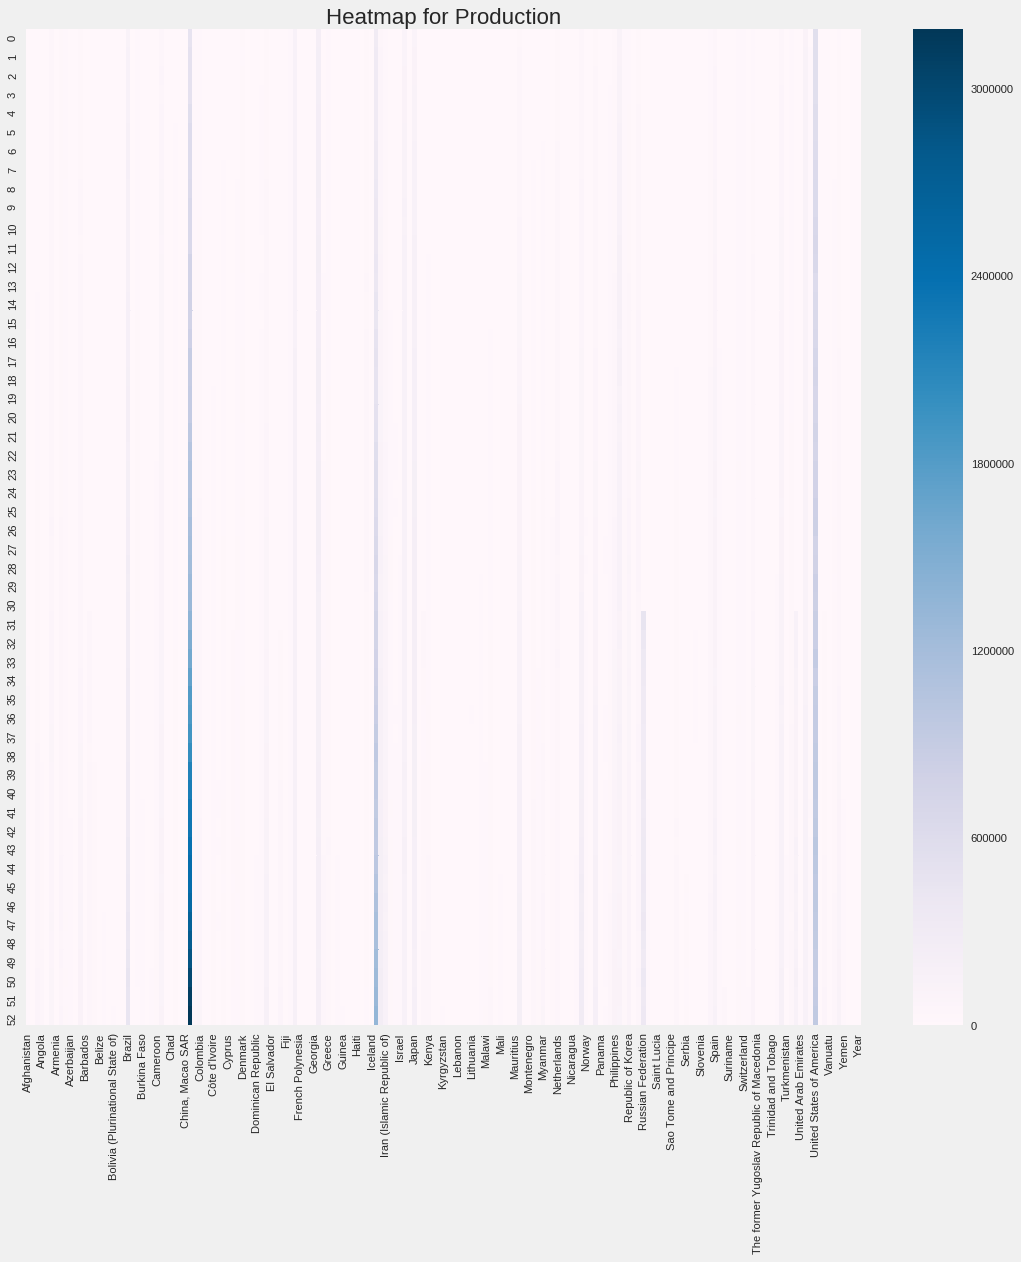

In [17]:

#heatmap

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')
 
sns.heatmap(new_data, cmap = 'PuBu')
plt.title('Heatmap for Production', fontsize = 20)
plt.yticks()
plt.show()

From the above graph we can see that the top producers are India, China, USA, Russia, and Brazil

## Time Series Analysis for Top Producers

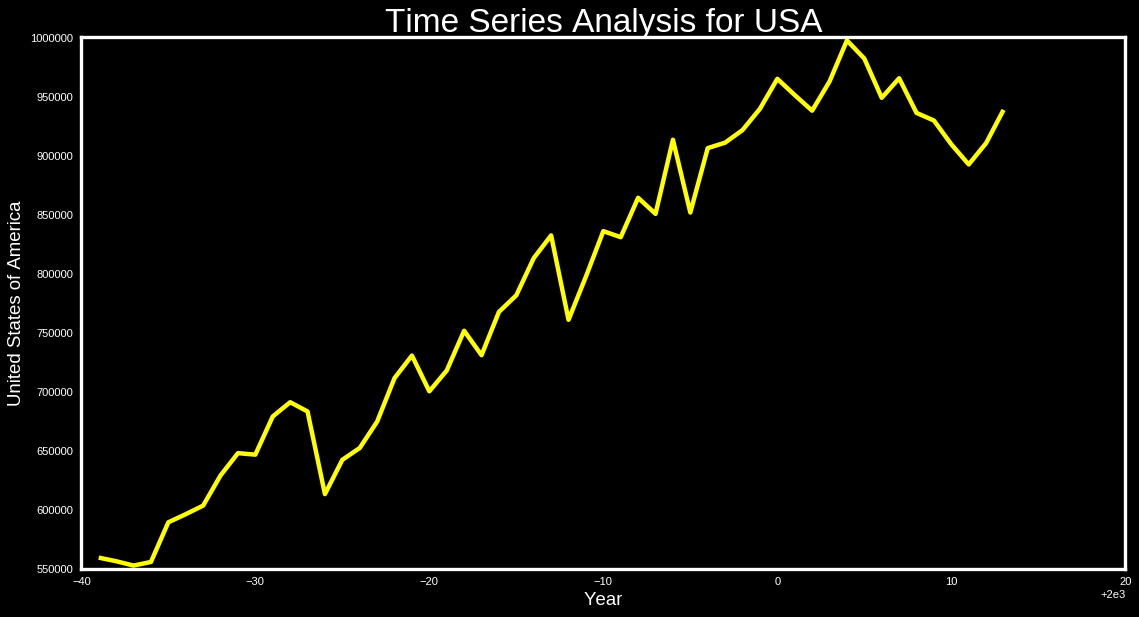

In [18]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['United States of America'], color = 'yellow')
plt.title('Time Series Analysis for USA', fontsize = 30)
plt.grid()
plt.show()

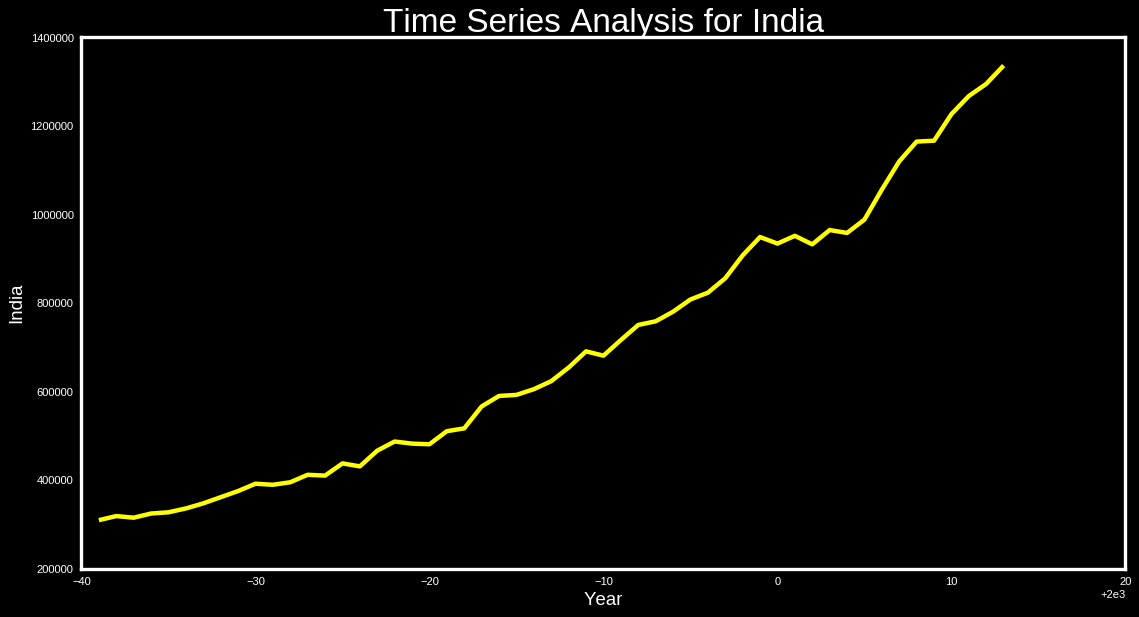

In [19]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['India'], color = 'yellow')
plt.title('Time Series Analysis for India', fontsize = 30)
plt.grid()
plt.show()

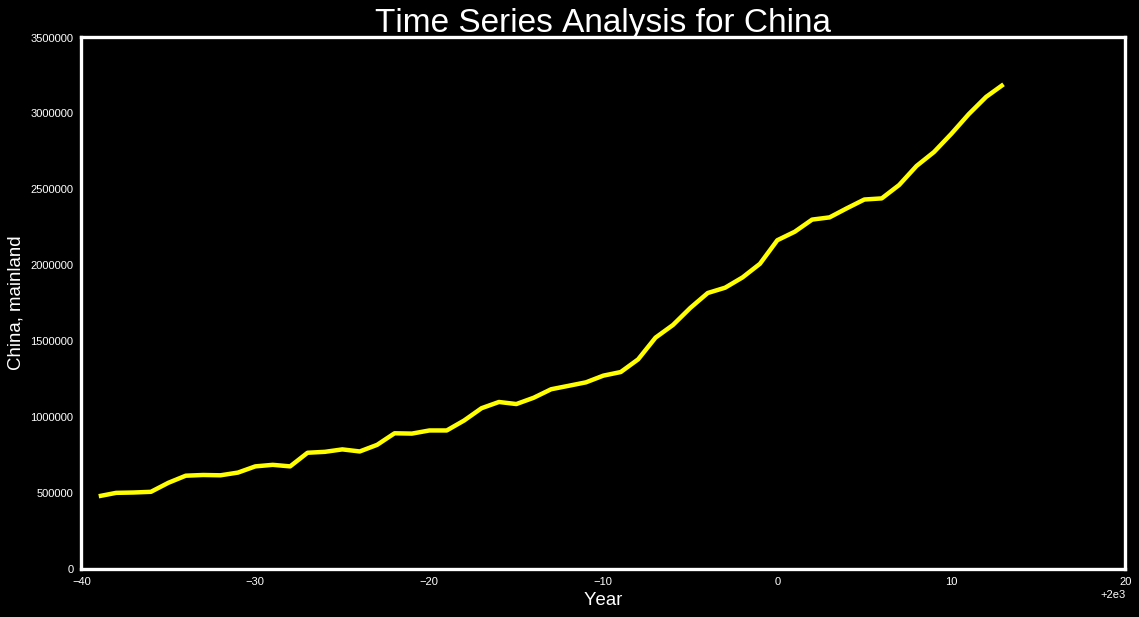

In [20]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['China, mainland'], color = 'yellow')
plt.title('Time Series Analysis for China', fontsize = 30)
plt.grid()
plt.show()

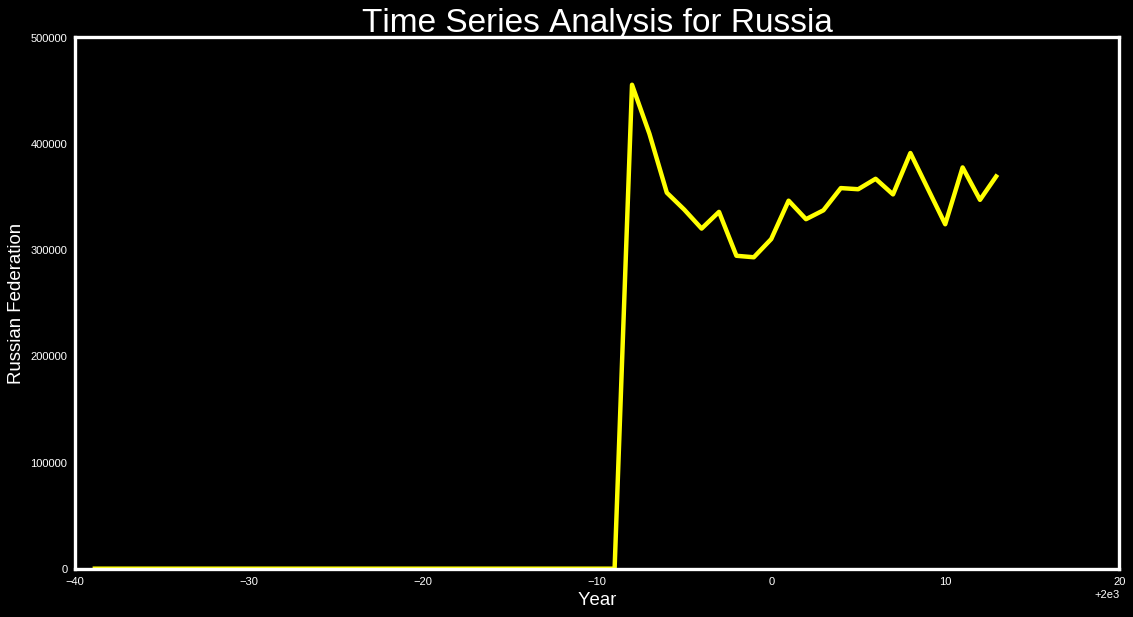

In [21]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['Russian Federation'], color = 'yellow')
plt.title('Time Series Analysis for Russia', fontsize = 30)
plt.grid()
plt.show()

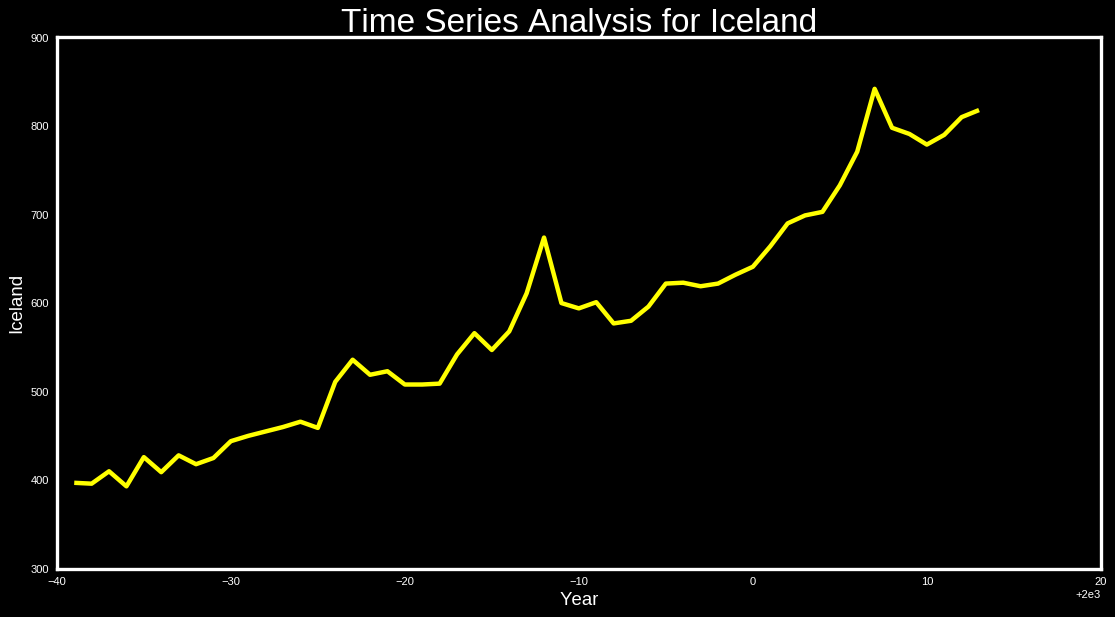

In [22]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['Iceland'], color = 'yellow')
plt.title('Time Series Analysis for Iceland', fontsize = 30)
plt.grid()
plt.show()

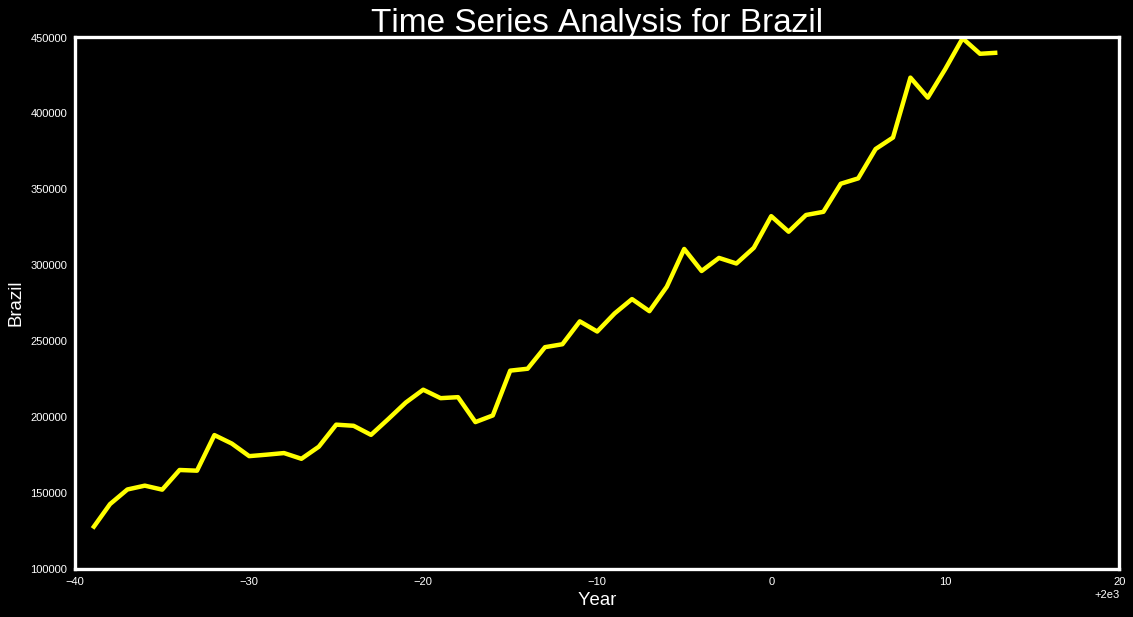

In [23]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')

sns.lineplot(new_data['Year'], new_data['Brazil'], color = 'yellow')
plt.title('Time Series Analysis for Brazil', fontsize = 30)
plt.grid()
plt.show()


<img src="https://media.giphy.com/media/3oz8xK0liGg1yTgcZq/giphy.gif" width="400px">

**Thanks for Reading the Kernel, Please upvote if you like it.**